(sec-statevectors-qiskit)=
# Statevectors in Qiskit

Kets are vectors defined in an abstract mathematical form.  Computers won't understand it directly. So far we used kets predefined in Qiskit.  In principle, you can construct any ket using the predefined basis vectors.  However, it is convenient if we can express kets directly without using the predefined basis. In other words, we need a simple expression of a ket in a form computers can understand.  *Matrix representation* is the most convenient solution.

When we use matrix representation, the computation basis is assumed unless otherwise is stated.  The state vector {eq}`eq-qubit-purestate` is expressed as $|\psi\rangle \doteq [c_0, c_1]$ in matrix expression. The matrix representation of the computational basis is $|0\rangle \doteq [1,0]$ and $|1\rangle \doteq [0,1]$.

Qiskit has several different ways to express state vectors depending on the tasks you are working on.  The following three classes are introduced in this section.

1. Statevector class
2. VectorSTateFn class
3. DictStateFn class

##  Statevector class

`Statevector` class is defined in `qiskit.quantum_info` library.  Its usage is described in 
[API reference: Statevector (in qiskit.quantum_info)](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html#qiskit.quantum_info.Statevector).  

It takes a python list as input (several other forms of inputs are allowed) and generates a matrix as `ndarray`.  You can optionally specify the dimension of the Hilbert space. If the dimmension is not given, it uses a default value.

The following examples show how to use the `Statevector` class. 


---
**Qiskit Example** {numref}`%s <sec-statevectors-qiskit>`.1 &nbsp;  Let us construct the general qubit state {eq}`eq-blochvector` in `Statevector` class.  Then, plot the Bloch vector using a class method `draw('bloch').

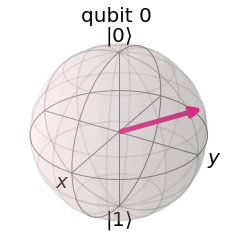

In [1]:
import numpy as np
from qiskit.quantum_info import Statevector

# set angular variables
theta = np.pi/5
phi=2*np.pi/3

# calculate the coefficients
c0=np.cos(theta)+0j
c1=np.sin(theta)*np.exp(phi*1j)

# constr
psi = Statevector([c0,c1])
psi.draw('bloch')

Take a look at the detailed information stored in `Statevector`.  It contains more information than the matrix expression. As shown below, it includes the dimension of Hilbert space.  In the current example, `dim=(2,)` means the statevector belongs to $\mathbb{C}^2$.

In [2]:
# show the whole contents in the statevector
psi

Statevector([ 0.80901699+0.j        , -0.29389263+0.50903696j],
            dims=(2,))


In some cases, we just wan to have the matrix expression only.  To extract the matrix out of the `Statevector`, use class attribute `data` as shown below.  The output is numpy ndarray which can be used in regular python calculation, for example the matrix elements can be accessed by index [].

In [3]:
psi_in_matrix = psi.data

# check the type of the matrix
print("type of matrix =",type(psi_in_matrix))

# output the whole matrix
print("matrix =",psi_in_matrix)

# output the individual matrix elements
print("c_0=",psi_in_matrix[0])
print("c_1=",psi_in_matrix[1])

type of matrix = <class 'numpy.ndarray'>
matrix = [ 0.80901699+0.j         -0.29389263+0.50903696j]
c_0= (0.8090169943749475+0j)
c_1= (-0.29389262614623646+0.5090369604551273j)



---
**Qiskit Example** {numref}`%s <sec-statevectors-qiskit>`.2 &nbsp;  

`Statevector` class behaves as mathematical vector.  Hence, addition and and scalar multiplication  work as expected. In the following example, the computational basis $|0\rangle$ and $|1\rangle$ are  prepared in `Statevecor` class and create $|\psi\rangle = \cos(\pi/4) |0\rangle + \sin(\pi/4) |1\rangle$.  Then, print out the result in a human readable form using a class method `draw('latex')`.

In [4]:
# generate |0> and |1> as statevector class
ket0 = Statevector([1,0])
ket1 = Statevector([0,1])

# construct cos(pi/4) |0> + sin(pi/4) |1>
psi = np.cos(np.pi/4) * ket0 + np.sin(np.pi/4) * ket1

# print out the result as latex equation
psi.draw('latex')

<IPython.core.display.Latex object>

`Statevector` class provides many useful methods and attributes (See [API reference: Statevector](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html#qiskit.quantum_info.Statevector)).    We will be using some of them in later chapters.  I will introduce them as needed.

## VectorStateFn class

`VectorStateFn` class deals with state vectors in matrix format much like `StateVector` class does.  In fact, `VectorStateFn` class expresses state vectors exactly in the same way as `Statevector` class.  As shown bellow, `VectorStateFn` wraps around `Statevector` along with a couple of more information about the statevector.

The `VectorStateFn` class is defined in `qiskit.opflow.statefn` library and its usage is given in
[API Document: VectorStateFn](https://qiskit.org/documentation/stubs/qiskit.opflow.state_fns.VectorStateFn.html#qiskit.opflow.state_fns.VectorStateFn).


---
**Qiskit Example** {numref}`%s <sec-statevectors-qiskit>`.3 &nbsp;  We construct a `VectoStateFn` class object from python a list in the same way as `Statevector`.  Then, we look into the detailed structure of the object. `VectorStateFn` consists of `Statevector`,  `coeff` and `is_measurement`.  We will discuss the extra information  later.  For now, we focus on the matrix representation.  You can extract `Statevector` out of `VectorStateFn` using `primitive` attribute.

In [5]:
# Load VectorStateFn class
from qiskit.opflow.state_fns import VectorStateFn

# contruct VectorStateFn object in the same way as Statevector object
psi = VectorStateFn([c0,c1])

# Show its content. Notice that it contains Statevector in it.
psi


VectorStateFn(Statevector([ 0.80901699+0.j        , -0.29389263+0.50903696j],
            dims=(2,)), coeff=1.0, is_measurement=False)

In [6]:
# Extract Statevector out of VectorStateFn using primitive attribute
psi.primitive

Statevector([ 0.80901699+0.j        , -0.29389263+0.50903696j],
            dims=(2,))



---
**Qiskit Example** {numref}`%s <sec-statevectors-qiskit>`.3 &nbsp;  We do the same as 
Qiskit Example {numref}`%s <sec-statevectors-qiskit>`.2 &nbsp;  but using `VectStateFn`.

In [7]:
# generate |0> and |1> as VectorStateFn
ket0 = VectorStateFn([1,0])
ket1 = VectorStateFn([0,1])

# construct cos(pi/4) |0> + sin(pi/4) |1> and print the statevector via `Statevector` class
psi = np.cos(np.pi/4) * ket0 + np.sin(np.pi/4) * ket1
psi.primitive.draw('latex')

<IPython.core.display.Latex object>